# **Internship Task 8: Clustering with K-Means**

# **Objective:**
**Perform unsupervised learning with K-Means clustering to segment mall customers based on their behavior**

# **Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# **Step 2: Load the Dataset**

In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Dataset Overview**

| **Column**               | **Description**                                           |
|--------------------------|-----------------------------------------------------------|
| **CustomerID**           | Unique ID of each customer                                |
| **Gender**               | Male/Female                                               |
| **Age**                  | Age of customer                                           |
| **Annual Income (k$)**   | Income in thousands                                       |
| **Spending Score (1-100)** | Score assigned by the mall based on spending behavior     |


# **Step 3: Exploratory Data Analysis (EDA)**

In [3]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

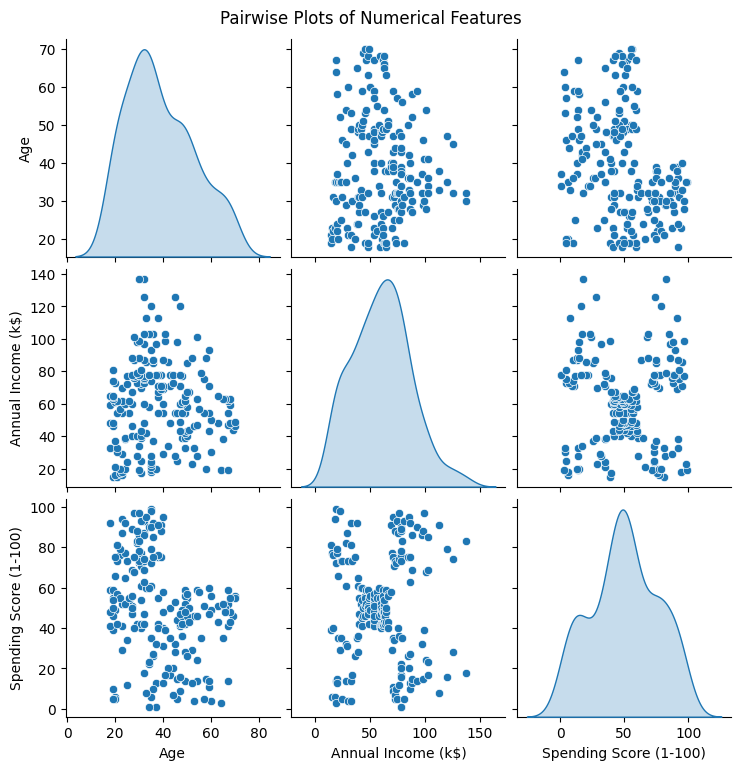

In [4]:
# Distribution plots
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.suptitle("Pairwise Plots of Numerical Features", y=1.02)
plt.show()


# **Distribution plots Insights**

The pairwise plot reveals key patterns in the **Mall Customer dataset**:

- Most customers are aged between **20 and 40 years**, indicating a youthful customer base.
- **Annual Income** and **Spending Score** do not correlate directly, but they show **distinct cluster tendencies**.
- Customers with **mid-level income** display both **high and low spending habits**, suggesting diverse financial behavior.
- **Younger customers** show a **wide variation in spending**, possibly influenced by preferences or lifestyle.

These patterns suggest the dataset is well-suited for **K-Means clustering** to uncover hidden customer segments.


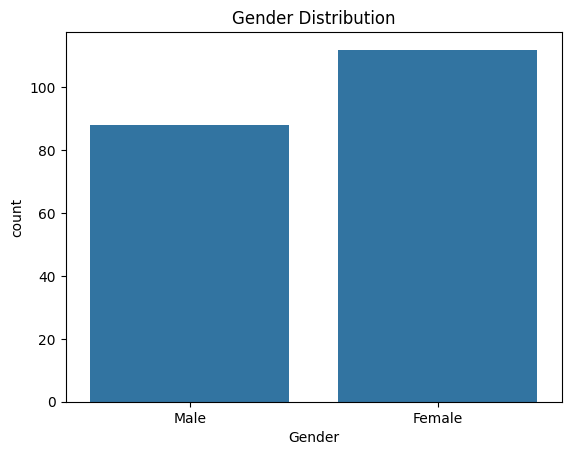

In [5]:
# Gender count
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.show()


#  **Insights: Gender Distribution**

- The bar chart shows the distribution of customers based on gender.
- From the visualization, we observe that the number of **female customers** is slightly **higher** than the number of **male customers**.
- This suggests that the mall may have a **slightly larger female customer base**, which could influence marketing or product placement strategies.


# **Step 4: Feature Selection**
**focus on Annual Income and Spending Score for clustering.**




In [6]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


# **Step 5: Elbow Method for Optimal Clusters**

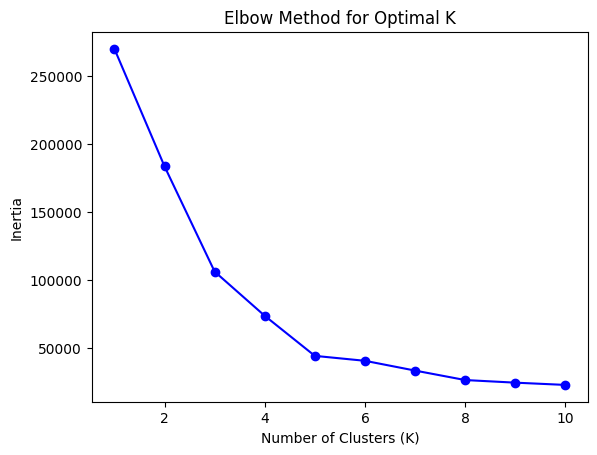

In [7]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


# **Elbow Method Insights from the GRAPH:**

- The Elbow Method graph shows the relationship between the number of clusters (`K`) and the within-cluster sum of squares (`inertia`).
- As the number of clusters increases, inertia decreases — but the rate of decrease slows down after a certain point.
- The **"elbow" point** is clearly visible at **K = 5**, where adding more clusters doesn’t significantly reduce inertia.
-**Optimal number of clusters = 5**. This value of K will likely give the best balance between underfitting and overfitting for our K-Means model.


# **Step 6: Apply K-Means Clustering**

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)


# **Step 7: Visualize Clusters**

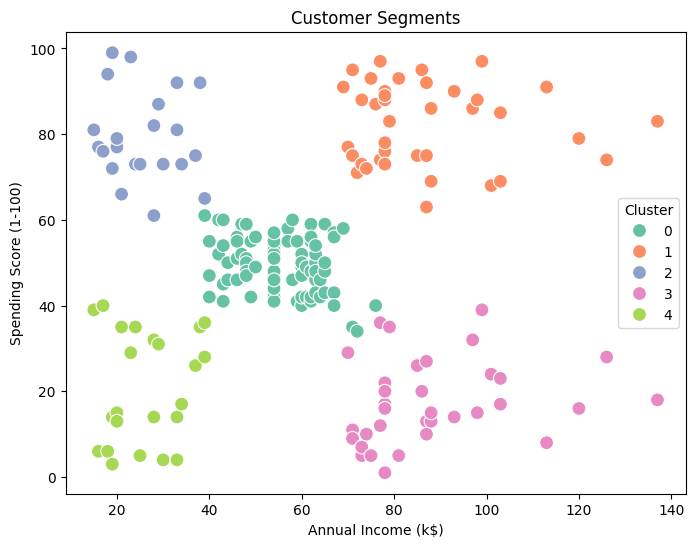

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set2', s=100)
plt.title('Customer Segments')
plt.show()


#**Customer Segmentation Insights from GRAPH**

The **K-Means clustering** has divided customers into **5 distinct groups** based on **Annual Income** and **Spending Score**:

- **Cluster 1 (Orange)**: High income, high spending — likely **premium customers**.
- **Cluster 2 (Pink)**: High income, low spending — **potential customers** with untapped value.
- **Cluster 3 (Green)**: Low income, low spending — **budget-conscious** group.
- **Cluster 4 (Purple)**: Low income, high spending — likely **impulse buyers** or deal seekers.
- **Cluster 0 (Teal)**: Moderate income and moderate spending — represents **average shoppers**.

These segments help in crafting **targeted marketing strategies** for each group, maximizing business value.


# **Step 8: Evaluate Clustering with Silhouette Score**

In [10]:
score = silhouette_score(X, data['Cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.554


# **Silhouette Score Insights**



A Silhouette Score of **0.554** suggests that the clusters are **well-formed and reasonably distinct**, making **K=5** a suitable choice for segmenting the customers.



# **Final Insights**

In [12]:
data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().style.background_gradient(cmap='YlGnBu')


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


# **Cluster Summary**
grouped customers into 5 types based on their age, income, and spending habits:

- **Cluster 0**: Middle-aged with average income and balanced spending.
- **Cluster 1**: Young professionals with high income and high spending — likely premium customers.
- **Cluster 2**: Young with low income but high spending — possibly students or trend-followers.
- **Cluster 3**: Older with high income but low spending — might be careful spenders or savers.
- **Cluster 4**: Older with low income and low spending — possibly retired or budget-conscious.

This helps the mall target each group better!
